In [11]:
library(lubridate)
library(dlookr)
library(dplyr)
library(mice)
library(VIM)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'dlookr'


The following object is masked from 'package:base':

    transform



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
data <- airquality
head(data)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [6]:
data[4:10,3] <- rep(NA,7)
data[1:5,4] <- NA
head(data)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,NA,5,1
2,36,118,8.0,NA,5,2
3,12,149,12.6,NA,5,3
4,18,313,NA,NA,5,4
5,NA,NA,NA,NA,5,5
6,28,NA,NA,66,5,6


In [4]:
data <- data[-c(5,6)]
summary(data)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :57.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:73.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.806   Mean   :78.28  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7       NA's   :7        NA's   :5      

In [12]:
diagnose(data)

variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
Ozone,integer,37,24.183007,68,0.44444444
Solar.R,integer,7,4.575163,118,0.77124183
Wind,numeric,7,4.575163,31,0.20261438
Temp,integer,5,3.267974,40,0.26143791
Month,integer,0,0.000000,5,0.03267974
Day,integer,0,0.000000,31,0.20261438


In [7]:
pMiss <- function(x){sum(is.na(x))/length(x)*100}
as.data.frame(apply(data,2,pMiss))
apply(data,1,pMiss)

,"apply(data, 2, pMiss)"
,<dbl>
Ozone,24.183007
Solar.R,4.575163
Wind,4.575163
Temp,3.267974
Month,0.000000
Day,0.000000


[1] 16.66667 16.66667 16.66667 33.33333 66.66667 33.33333 16.66667 16.66667
  [9] 16.66667 33.33333 16.66667  0.00000  0.00000  0.00000  0.00000  0.00000
 [17]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [25] 16.66667 16.66667 33.33333  0.00000  0.00000  0.00000  0.00000 16.66667
 [33] 16.66667 16.66667 16.66667 16.66667 16.66667  0.00000 16.66667  0.00000
 [41]  0.00000 16.66667 16.66667  0.00000 16.66667 16.66667  0.00000  0.00000
 [49]  0.00000  0.00000  0.00000 16.66667 16.66667 16.66667 16.66667 16.66667
 [57] 16.66667 16.66667 16.66667 16.66667 16.66667  0.00000  0.00000  0.00000
 [65] 16.66667  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 16.66667
 [73]  0.00000  0.00000 16.66667  0.00000  0.00000  0.00000  0.00000  0.00000
 [81]  0.00000  0.00000 16.66667 16.66667  0.00000  0.00000  0.00000  0.00000
 [89]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 16.66667
 [97] 16.66667 16.66667  0.00000  0.00000  0.00000 16.66667 16.66667  0.00000
[105]  0.00000  0.00000 16.66667  0.00000  0.00000  0.00000  0.00000  0.00000
[113]  0.00000  0.00000 16.66667  0.00000  0.00000  0.00000 16.66667  0.00000
[121]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
[129]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
[137]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
[145]  0.00000  0.00000  0.00000  0.00000  0.00000 16.66667  0.00000  0.00000
[153]  0.00000


 Variables sorted by number of missings: 
 Variable      Count
    Ozone 0.24183007
  Solar.R 0.04575163
     Wind 0.04575163
     Temp 0.03267974
    Month 0.00000000
      Day 0.00000000


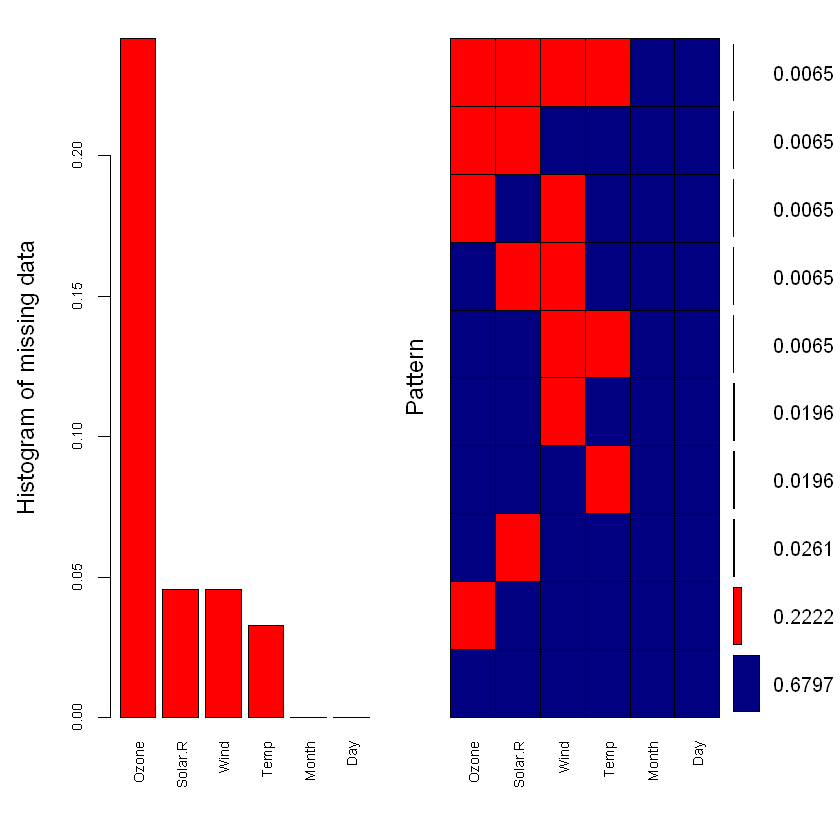

In [8]:
aggr_plot <- aggr(data, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(data), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))

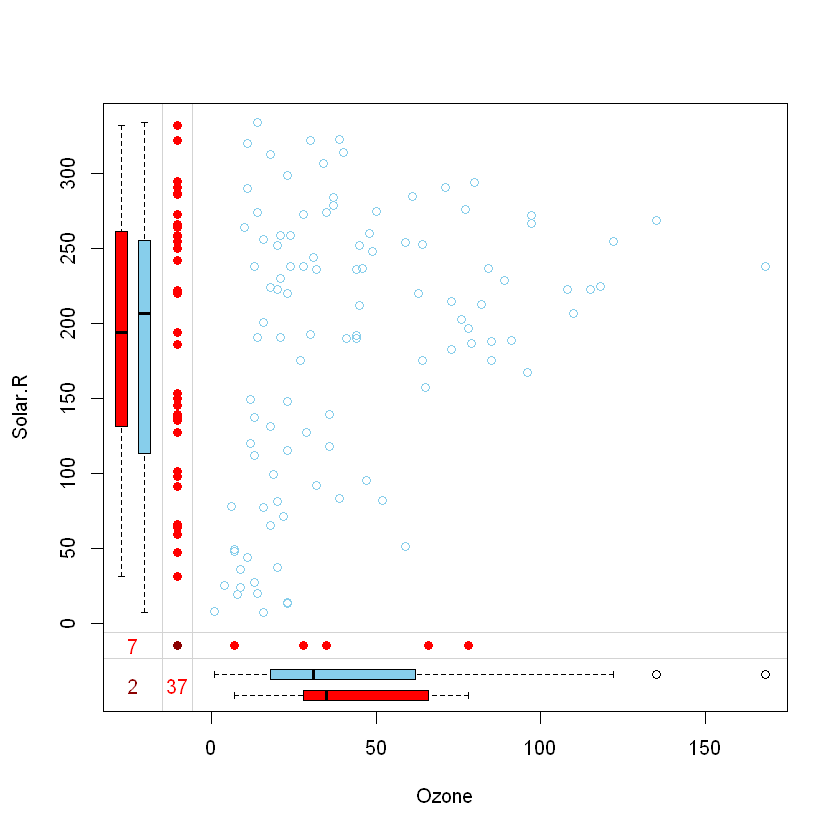

In [9]:
marginplot(data[c(1,2)])

In [13]:
tempData <- mice(data,m=5,maxit=50,meth='pmm')
summary(tempData)


 iter imp variable
  1   1  Ozone  Solar.R  Wind  Temp
  1   2  Ozone  Solar.R  Wind  Temp
  1   3  Ozone  Solar.R  Wind  Temp
  1   4  Ozone  Solar.R  Wind  Temp
  1   5  Ozone  Solar.R  Wind  Temp
  2   1  Ozone  Solar.R  Wind  Temp
  2   2  Ozone  Solar.R  Wind  Temp
  2   3  Ozone  Solar.R  Wind  Temp
  2   4  Ozone  Solar.R  Wind  Temp
  2   5  Ozone  Solar.R  Wind  Temp
  3   1  Ozone  Solar.R  Wind  Temp
  3   2  Ozone  Solar.R  Wind  Temp
  3   3  Ozone  Solar.R  Wind  Temp
  3   4  Ozone  Solar.R  Wind  Temp
  3   5  Ozone  Solar.R  Wind  Temp
  4   1  Ozone  Solar.R  Wind  Temp
  4   2  Ozone  Solar.R  Wind  Temp
  4   3  Ozone  Solar.R  Wind  Temp
  4   4  Ozone  Solar.R  Wind  Temp
  4   5  Ozone  Solar.R  Wind  Temp
  5   1  Ozone  Solar.R  Wind  Temp
  5   2  Ozone  Solar.R  Wind  Temp
  5   3  Ozone  Solar.R  Wind  Temp
  5   4  Ozone  Solar.R  Wind  Temp
  5   5  Ozone  Solar.R  Wind  Temp
  6   1  Ozone  Solar.R  Wind  Temp
  6   2  Ozone  Solar.R  Wind  Temp
  6   3 

In [14]:
tempData$imp$Ozone

,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>
5,23,28,59,22,44
10,20,19,4,7,20
25,14,8,18,18,8
26,4,37,1,32,32
27,23,18,18,9,32
32,65,65,46,46,28
33,11,16,7,65,7
34,8,37,19,18,1
35,29,40,46,40,23


In [15]:
completedData <- complete(tempData,1)

In [17]:
head(completedData,20)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,82,5,1
2,36,118,8.0,71,5,2
3,12,149,12.6,78,5,3
4,18,313,11.5,82,5,4
5,23,19,1.7,71,5,5
6,28,81,11.5,66,5,6
7,23,299,9.7,65,5,7
8,19,99,7.4,59,5,8
9,8,19,12.0,61,5,9
